In [0]:
! pip install hdbscan

     |████████████████████████████████| 4.7MB 2.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2308907 sha256=8c150d8aed8be041deb17ff284540a606759a74473adabdbf85e6e511ea54cfd
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


In [0]:
import hdbscan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from scipy.sparse import load_npz

features = load_npz('/content/features_3cat_geo.npz')

In [0]:
labels = np.load('labels_3cat_geo.npy', allow_pickle=True)

In [4]:
features.shape, labels.shape

((1480, 160444), (1480,))

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [0]:
lda = LDA(n_components=2)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=.9, test_size=.1,
                                                    random_state=1337, stratify=labels)

pos = lda.fit_transform(X_train.toarray(), y_train)

In [0]:
pos.shape

(1332, 2)

In [0]:
encoding = {subj: i for i, subj in enumerate(np.unique(labels))}
labels_encoded = [encoding[label] for label in labels]

In [0]:
color_palette = sns.color_palette('deep', np.unique(labels).shape[0])
cluster_colors = [color_palette[x] for x in labels_encoded]
plt.scatter(*features.T, s=50, linewidth=0, c=cluster_colors, alpha=0.5)
plt.title('True labels')
plt.show()

TypeError: ignored

In [0]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15,
                            min_samples=1).fit(features)

In [0]:
clusterer.labels_.max()

2

In [0]:
clusterer.condensed_tree_.plot()

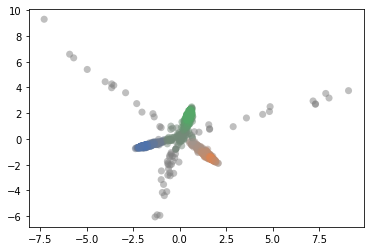

In [0]:
color_palette = sns.color_palette('deep', clusterer.labels_.max() + 1)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*pos.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.5)

In [0]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=np.unique(labels).shape[0], verbose=True)

In [0]:
km.fit(features)

Initialization complete
Iteration  0, inertia 2846.805
Iteration  1, inertia 1437.932
Iteration  2, inertia 1437.736
Iteration  3, inertia 1437.646
Iteration  4, inertia 1437.632
Converged at iteration 4: center shift 0.000000e+00 within tolerance 6.069252e-10
Initialization complete
Iteration  0, inertia 2849.501
Iteration  1, inertia 1436.715
Iteration  2, inertia 1436.112
Iteration  3, inertia 1435.818
Iteration  4, inertia 1435.763
Iteration  5, inertia 1435.744
Iteration  6, inertia 1435.740
Iteration  7, inertia 1435.737
Converged at iteration 7: center shift 0.000000e+00 within tolerance 6.069252e-10
Initialization complete
Iteration  0, inertia 2845.157
Iteration  1, inertia 1438.209
Iteration  2, inertia 1437.653
Iteration  3, inertia 1436.889
Iteration  4, inertia 1436.322
Iteration  5, inertia 1436.060
Iteration  6, inertia 1435.950
Iteration  7, inertia 1435.902
Iteration  8, inertia 1435.891
Iteration  9, inertia 1435.879
Iteration 10, inertia 1435.873
Iteration 11, inerti

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=True)

In [0]:
from sklearn import metrics

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))

Homogeneity: 0.060
Completeness: 0.092
V-measure: 0.072
Adjusted Rand-Index: 0.073


In [0]:
pos_test = lda.predict(X_test.toarray())

In [0]:
km.n_clusters

3

In [0]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_test, pos_test))
print("Completeness: %0.3f" % metrics.completeness_score(y_test, pos_test))
print("V-measure: %0.3f" % metrics.v_measure_score(y_test, pos_test))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(y_test, pos_test))

Homogeneity: 0.311
Completeness: 0.360
V-measure: 0.334
Adjusted Rand-Index: 0.288
